In [109]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal

## Signal simulation

In [169]:
fs=2048 #CHECK

In [170]:
spike = sio.loadmat('spike.mat')["spike"].flatten().tolist()

In [171]:
len(spike[360::])*20, len(spike[:40])*20, len(spike)

(800, 800, 400)

In [172]:
len(spike)

400

In [173]:
#spike_ = np.array(spike[:20] * 40
     #            + spike
      #           + spike[:20] * 40)

In [174]:
spike_ = np.array([0] * 400
                 + spike
                 + [0] * 400)

In [175]:
white_noise = np.random.normal(0, 1.0, len(spike_)) * 10**(-12)
new_spike = spike_ + white_noise

In [176]:
from scipy.signal import convolve

gaussian_window = signal.windows.gaussian(len(new_spike), std=5) # how to pick std?
normalized_window = gaussian_window / np.sum(gaussian_window)
filtered_spike = convolve(new_spike, normalized_window, mode='same')

In [177]:
filtered_spike.shape

(1200,)

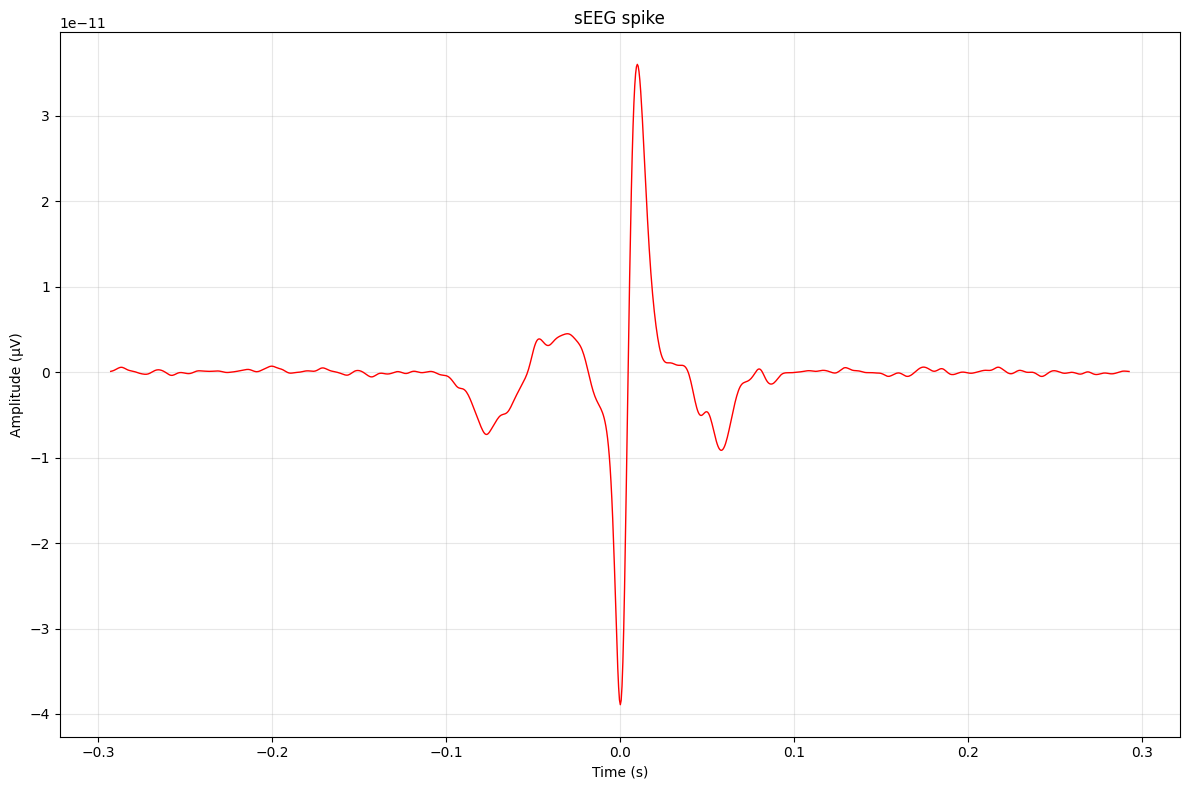

In [178]:
def plot_spike_waveforms(spike_trials, fs=fs, title="Spikes sEEG"):

    fig, ax = plt.subplots(figsize=(12, 8))   
    time = np.arange(-600, 600) / fs
    x_label = "Time (s)"

    average_waveform = spike_trials 
    
    ax.plot(time, average_waveform, 
            color='red', 
            linewidth=1)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel("Amplitude (µV)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig, ax

fig, ax = plot_spike_waveforms(filtered_spike, fs=fs, title="sEEG spike")
plt.show()

In [179]:
#several_spikes = np.array((spike[:20] * 40
 #                + spike
  #               + spike[:20] * 40) * 100)

In [180]:
several_spikes = np.array(filtered_spike.tolist() * 100)

In [39]:
several_spikes.shape

(120000,)

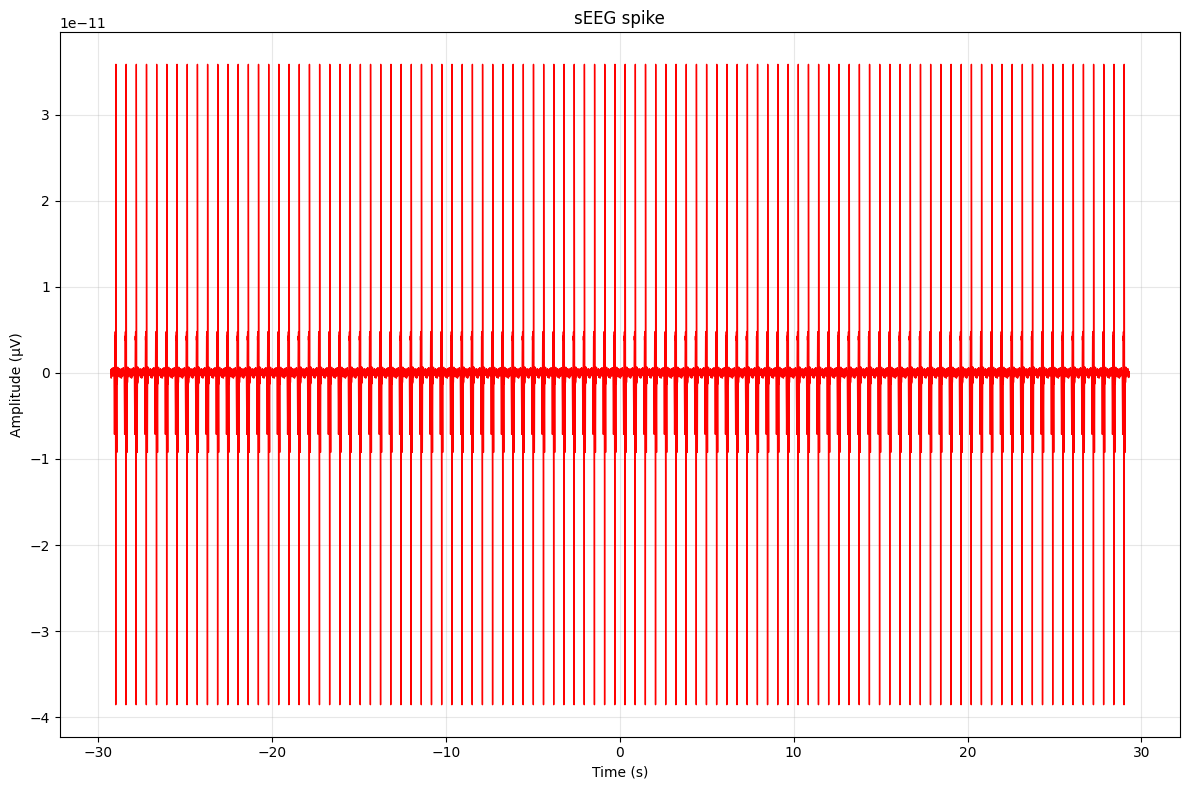

In [18]:
def plot_spike_waveforms(spike_trials, fs=fs, title="Spikes sEEG"):

    fig, ax = plt.subplots(figsize=(12, 8))   
    time = np.arange(-60000, 60000) / fs
    x_label = "Time (s)"

    average_waveform = spike_trials 
    
    ax.plot(time, average_waveform, 
            color='red', 
            linewidth=1)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel("Amplitude (µV)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    return fig, ax

fig, ax = plot_spike_waveforms(several_spikes, fs=fs, title="sEEG spike")
plt.show()

## Reading data

In [2]:
noise = mne.io.read_raw_fif('resting_state_tsss_mc_trans.fif')

Opening raw data file resting_state_tsss_mc_trans.fif...
    Range : 113000 ... 762999 =    113.000 ...   762.999 secs
Ready.


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/3322205947.py:1: RuntimeWarning: This filename (resting_state_tsss_mc_trans.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  noise = mne.io.read_raw_fif('resting_state_tsss_mc_trans.fif')


In [3]:
noise_prep = noise.pick('meg')

In [4]:
noise_prep.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers
 custom_ref_applied: False
 description: Vectorview system
 dev_head_t: MEG device -> head transform
 dig: 165 items (3 Cardinal, 4 HPI, 158 Extra)
 experimenter: meg
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2020-07-29 11:46:58 UTC
 meas_id: 4 items (dict)
 nchan: 306
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: abrar
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

In [5]:
#noise.plot()

In [6]:
subjects_dir = '/Users/diana/mne_data/MNE-fsaverage-data'
subject = 'fsaverage'
trans = 'fsaverage'

In [7]:
model = mne.make_bem_model(subject='fsaverage', ico=4, conductivity=[0.3,],
                               subjects_dir=subjects_dir)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.53 -21.10   6.21 mm
Surfaces passed the basic topology checks.
Complete.



In [8]:
fbem = 'bem_solution.fif'
#mne.write_bem_solution(fbem, bem, overwrite=True)
bem = mne.read_bem_solution(fbem, verbose='error')

In [9]:
fsrc = 'fsaverage_scr_oct6.fif'
src = mne.read_source_spaces(fsrc, verbose='error')

In [10]:
fwd_name = 'forward_oct6.fif'
#mne.write_forward_solution(fwd_name, fwd, overwrite=True)
fwd = mne.read_forward_solution(fwd_name, verbose='error')

In [11]:
fwd

Magnetometers,"<button class=""channel-names-btn"" onclick=""alert('Good Magnetometers:\n\nMEG0111, MEG0121, MEG0131, MEG0141, MEG0211, MEG0221, MEG0231, MEG0241, MEG0311, MEG0321, MEG0331, MEG0341, MEG0411, MEG0421, MEG0431, MEG0441, MEG0511, MEG0521, MEG0531, MEG0541, MEG0611, MEG0621, MEG0631, MEG0641, MEG0711, MEG0721, MEG0731, MEG0741, MEG0811, MEG0821, MEG0911, MEG0921, MEG0931, MEG0941, MEG1011, MEG1021, MEG1031, MEG1041, MEG1111, MEG1121, MEG1131, MEG1141, MEG1211, MEG1221, MEG1231, MEG1241, MEG1311, MEG1321, MEG1331, MEG1341, MEG1411, MEG1421, MEG1431, MEG1441, MEG1511, MEG1521, MEG1531, MEG1541, MEG1611, MEG1621, MEG1631, MEG1641, MEG1711, MEG1721, MEG1731, MEG1741, MEG1811, MEG1821, MEG1831, MEG1841, MEG1911, MEG1921, MEG1931, MEG1941, MEG2011, MEG2021, MEG2031, MEG2041, MEG2111, MEG2121, MEG2131, MEG2141, MEG2211, MEG2221, MEG2231, MEG2241, MEG2311, MEG2321, MEG2331, MEG2341, MEG2411, MEG2421, MEG2431, MEG2441, MEG2511, MEG2521, MEG2531, MEG2541, MEG2611, MEG2621, MEG2631, MEG2641')"" title=""Show good channel names""> 102"
Gradiometers,"<button class=""channel-names-btn"" onclick=""alert('Good Gradiometers:\n\nMEG0113, MEG0112, MEG0122, MEG0123, MEG0132, MEG0133, MEG0143, MEG0142, MEG0213, MEG0212, MEG0222, MEG0223, MEG0232, MEG0233, MEG0243, MEG0242, MEG0313, MEG0312, MEG0322, MEG0323, MEG0333, MEG0332, MEG0343, MEG0342, MEG0413, MEG0412, MEG0422, MEG0423, MEG0432, MEG0433, MEG0443, MEG0442, MEG0513, MEG0512, MEG0523, MEG0522, MEG0532, MEG0533, MEG0542, MEG0543, MEG0613, MEG0612, MEG0622, MEG0623, MEG0633, MEG0632, MEG0642, MEG0643, MEG0713, MEG0712, MEG0723, MEG0722, MEG0733, MEG0732, MEG0743, MEG0742, MEG0813, MEG0812, MEG0822, MEG0823, MEG0913, MEG0912, MEG0923, MEG0922, MEG0932, MEG0933, MEG0942, MEG0943, MEG1013, MEG1012, MEG1023, MEG1022, MEG1032, MEG1033, MEG1043, MEG1042, MEG1112, MEG1113, MEG1123, MEG1122, MEG1133, MEG1132, MEG1142, MEG1143, MEG1213, MEG1212, MEG1223, MEG1222, MEG1232, MEG1233, MEG1243, MEG1242, MEG1312, MEG1313, MEG1323, MEG1322, MEG1333, MEG1332, MEG1342, MEG1343, MEG1412, MEG1413, MEG1423, MEG1422, MEG1433, MEG1432, MEG1442, MEG1443, MEG1512, MEG1513, MEG1522, MEG1523, MEG1533, MEG1532, MEG1543, MEG1542, MEG1613, MEG1612, MEG1622, MEG1623, MEG1632, MEG1633, MEG1643, MEG1642, MEG1713, MEG1712, MEG1722, MEG1723, MEG1732, MEG1733, MEG1743, MEG1742, MEG1813, MEG1812, MEG1822, MEG1823, MEG1832, MEG1833, MEG1843, MEG1842, MEG1912, MEG1913, MEG1923, MEG1922, MEG1932, MEG1933, MEG1943, MEG1942, MEG2013, MEG2012, MEG2023, MEG2022, MEG2032, MEG2033, MEG2042, MEG2043, MEG2113, MEG2112, MEG2122, MEG2123, MEG2133, MEG2132, MEG2143, MEG2142, MEG2212, MEG2213, MEG2223, MEG2222, MEG2233, MEG2232, MEG2242, MEG2243, MEG2312, MEG2313, MEG2323, MEG2322, MEG2332, MEG2333, MEG2343, MEG2342, MEG2412, MEG2413, MEG2423, MEG2422, MEG2433, MEG2432, MEG2442, MEG2443, MEG2512, MEG2513, MEG2522, MEG2523, MEG2533, MEG2532, MEG2543, MEG2542, MEG2612, MEG2613, MEG2623, MEG2622, MEG2633, MEG2632, MEG2642, MEG2643')"" title=""Show good channel names""> 204"
Source space,"Mixed (2 surface, 4 volume) with 8310 vertices"
Source orientation,Free


In [12]:
fstc = 'spike-smooth-stc.h5'
stc = mne.read_source_estimate(fstc, subject='fsaverage')
# redo with mne.MixedVectorSourceEstimate !

In [13]:
src

<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>, <volume (Left-Hippocampus), n_used=39>, <volume (Left-Amygdala), n_used=14>, <volume (Right-Hippocampus), n_used=42>, <volume (Right-Amygdala), n_used=19>] MRI (surface RAS) coords, subject 'fsaverage', ~322.3 MB>

In [14]:
stc.data.shape

(8310, 120000)

## STC construction

In [160]:
total_vers = sum([x["nuse"] for x in src])

In [161]:
all_deep_vers = [x["vertno"].tolist() for x in src[2::]]

In [162]:
vers = []
for x in all_deep_vers:
    vers += x
unique_deep_vers = set(vers)

In [163]:
len(unique_deep_vers)

114

In [164]:
deep_data_mask = [1 if x==12297 else 0 for x in unique_deep_vers]
#deep_data_mask = [1 if x==16060 else 0 for x in unique_deep_vers]

In [165]:
total_vers

8310

In [166]:
src[4]["vertno"] # let's pick Right Hippocampus

array([12297, 12298, 13550, 13551, 13552, 13553, 13583, 13584, 13585,
       14805, 14806, 14807, 14837, 14838, 14839, 14840, 14869, 14870,
       16027, 16028, 16059, 16060, 16061, 16092, 16093, 16094, 16124,
       17281, 17282, 17313, 17314, 17315, 17347, 17348, 18534, 18535,
       18566, 18567, 18568, 19820, 19821, 21107])

- let 12297 be our source

In [167]:
#deep_data = [several_spikes.tolist() if x==1 else [0] * several_spikes.shape[0] for x in deep_data_mask]

In [181]:
data = [[0] * several_spikes.shape[0]] * total_vers

In [182]:
#data[-61] = several_spikes.tolist()
data[-40] = several_spikes.tolist()

In [183]:
all_vers = [x["vertno"] for x in src]

In [184]:
stc_data = np.array(data)

In [185]:
stc_data.shape

(8310, 120000)

In [186]:
from mne import MixedSourceEstimate

stc = MixedSourceEstimate(
    stc_data,
    all_vers,
    tmin=0,
    tstep=1/2048,
    subject='fsaverage'
)

In [187]:
stc

<MixedSourceEstimate | 8310 vertices, subject : fsaverage, tmin : 0.0 (ms), tmax : 58593.26171875 (ms), tstep : 0.48828125 (ms), data shape : (8310, 120000), ~7.43 GB>

In [64]:
tiny_stc.plot(
    src=src,
    surface='pial'
)

Using control points [0. 0. 0.]


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_46980/509997133.py:1: RuntimeWarning: All data were zero
  tiny_stc.plot(


In [71]:
fwd["src"]

<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>, <volume (Left-Hippocampus), n_used=39>, <volume (Left-Amygdala), n_used=14>, <volume (Right-Hippocampus), n_used=42>, <volume (Right-Amygdala), n_used=19>] head coords, subject 'fsaverage', ~328.0 MB>

In [73]:
fwd["sol"]["data"].shape

(306, 24930)

## Forward + noise 

In [188]:
gain = fwd['sol']['data']
n_sources = gain.shape[1] // 3
gain_fixed = np.zeros((gain.shape[0], n_sources))

for i in range(n_sources):
    gx = gain[:, 3*i + 0]
    gy = gain[:, 3*i + 1]
    gz = gain[:, 3*i + 2]
    gain_fixed[:, i] = np.sqrt(gx**2 + gy**2 + gz**2)

In [189]:
stc.data.shape

(8310, 120000)

In [190]:
gain_fixed.shape

(306, 8310)

In [191]:
evoked_data = gain_fixed @ stc.data

In [192]:
evoked_data.shape

(306, 120000)

In [193]:
evoked = mne.EvokedArray(evoked_data, info=noise_prep.info, tmin=0)

In [19]:
#evoked.save('pure_evoked-ave.fif')

In [194]:
SNR = 3

In [195]:
noise_to_add = noise_prep.get_data(start=1000, stop=121000)/ 10**4 * 1.2 / SNR
noised_evoked = mne.EvokedArray(evoked_data, info=noise_prep.info, tmin=0)
noised_evoked.data = evoked.data + noise_to_add # adding noise

In [55]:
max(noise_prep.get_data(start=1000, stop=121000)[156])

3.097962792812273e-11

In [56]:
max(noise_to_add[156])

3.717555351374728e-16

In [50]:
max_sensor = 0
max_gain =  0

for i in range(evoked.data.shape[0]):
    if max(evoked.data[i]) > max_gain:
        max_gain = max(evoked.data[i]) 
        max_sensor = i

In [51]:
max_sensor, max_gain

(156, 4.216430836459022e-15)

In [196]:
noised_data = noised_evoked.data * 10**4

In [56]:
max(noised_data[156])

1.751406391958513e-11

In [197]:
raw_noised = mne.io.RawArray(noised_data, info=noise_prep.info)

Creating RawArray with float64 data, n_channels=306, n_times=120000
    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.


In [24]:
noised_data

array([[-1.04359348e-12,  1.46668283e-12,  1.46079568e-12, ...,
        -1.12066699e-12, -2.21507576e-13, -3.80837154e-13],
       [-1.00546450e-12, -3.51331590e-14,  7.71335114e-13, ...,
         1.98530783e-13, -7.61255716e-13, -9.46278389e-13],
       [ 1.74670343e-13,  5.77129736e-14,  5.97479494e-14, ...,
         4.97586589e-14,  5.45617809e-14,  4.16927369e-14],
       ...,
       [-3.37703024e-12, -1.86415965e-12,  1.37955096e-12, ...,
        -1.61964034e-12, -1.52915365e-12, -1.13954218e-12],
       [-7.14471009e-13,  9.21528741e-14, -2.97348929e-13, ...,
        -1.25560348e-12, -2.33826835e-12, -2.89175990e-12],
       [-6.62577261e-14, -1.28267456e-13, -4.82934348e-14, ...,
         1.18078163e-13,  5.47236278e-14,  3.43492254e-14]])

In [59]:
#raw_noised.copy().crop(tmin=0, tmax=1.2).plot()

Using pyopengl with version 3.1.9


In [25]:
fraw = 'SIM_5_raw_tsss_mc.fif'
raw_noised.save('SIM_5_raw_tsss_mc.fif', overwrite=True)    # current smooth spike

Writing /Users/diana/Desktop/Tommaso/sim/SIM_5_raw_tsss_mc.fif


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_26263/2139693830.py:2: RuntimeWarning: This filename (/Users/diana/Desktop/Tommaso/sim/SIM_5_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_noised.save('SIM_5_raw_tsss_mc.fif', overwrite=True)    # current smooth spike


Closing /Users/diana/Desktop/Tommaso/sim/SIM_5_raw_tsss_mc.fif
[done]


In [15]:
raw_noised = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')

Opening raw data file SIM_10_raw_tsss_mc.fif...
    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_31961/1755629564.py:1: RuntimeWarning: This filename (SIM_10_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_noised = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')


In [27]:
#noised_evoked.save('noised_evoked-ave.fif')

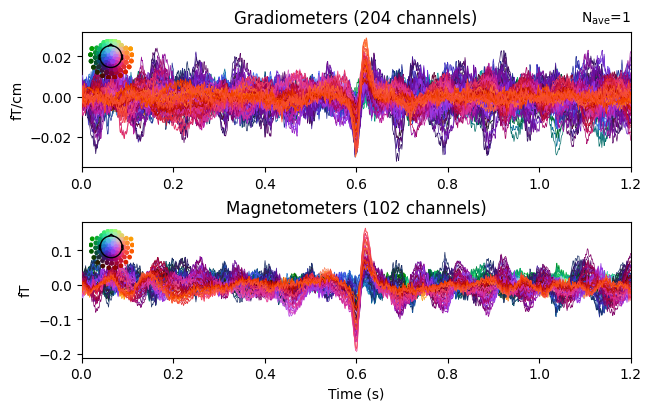

In [198]:
noised_evoked.copy().crop(tmin=0, tmax=1.2).plot();

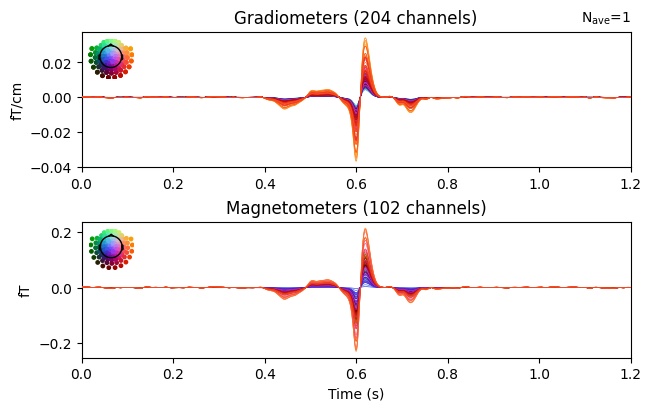

In [29]:
evoked.copy().crop(tmin=0, tmax=1.2).plot();

## Inverse

In [110]:
raw_noised = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')

Opening raw data file SIM_10_raw_tsss_mc.fif...


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/1755629564.py:1: RuntimeWarning: This filename (SIM_10_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_noised = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')


    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.


In [199]:
sfreq = raw_noised.info['sfreq']
duration = 1200 / sfreq

epochs = mne.make_fixed_length_epochs(
    raw_noised,
    duration=duration,
    preload=True,
    overlap=0
)

Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 100 events and 1200 original time points ...
0 bad epochs dropped


In [200]:
epochs.plot()

Using pyopengl with version 3.1.9


In [201]:
evoked = epochs.average()

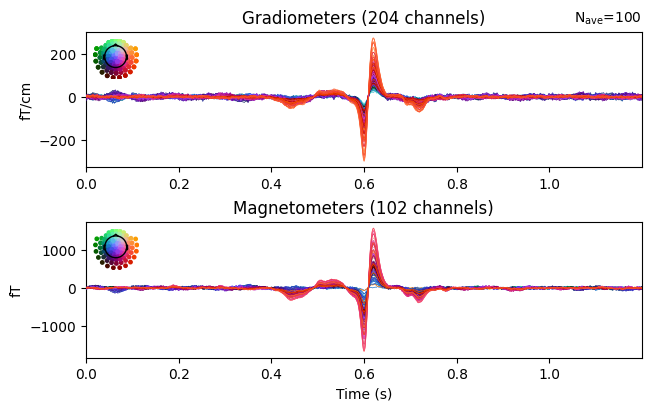

In [202]:
evoked.plot();

In [204]:
noise_cov = mne.compute_covariance(
    epochs,
    tmin=None,     
    tmax=0.5,       
    method='shrunk'
)

/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/2479002291.py:1: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  noise_cov = mne.compute_covariance(
/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/2479002291.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (306 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov = mne.compute_covariance(


Reducing data rank from 306 -> 306
Estimating covariance using SHRUNK
Done.
Number of samples used : 50100
[done]


    The projection vectors do not apply to these channels.
Computing rank from covariance with rank=None
    Using tolerance 4e-14 (2.2e-16 eps * 102 dim * 1.8  max singular value)
    Estimated rank (mag): 102
Found multiple SSS records. Using the first.
    MAG: rank 102 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 5e-13 (2.2e-16 eps * 204 dim * 11  max singular value)
    Estimated rank (grad): 204
Found multiple SSS records. Using the first.
    GRAD: rank 204 computed from 204 data channels with 0 projectors


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/102049103.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov.plot(noise_prep.info, proj=True);
/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/102049103.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (204 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov.plot(noise_prep.info, proj=True);


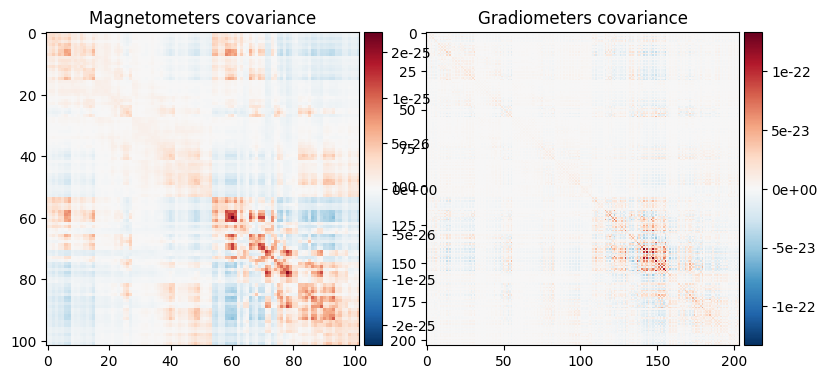

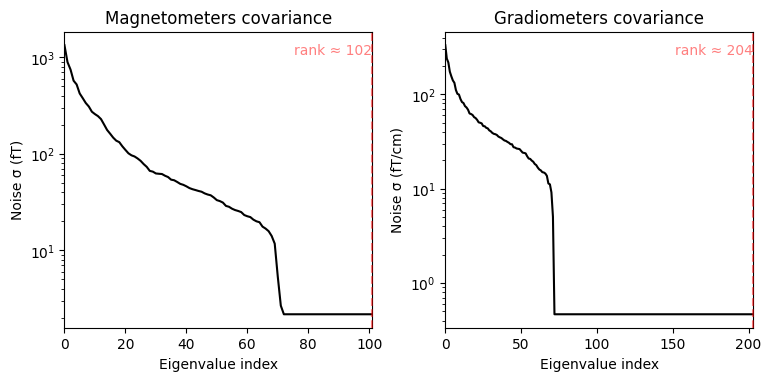

In [205]:
noise_cov.plot(noise_prep.info, proj=True);

    The projection vectors do not apply to these channels.
Computing rank from covariance with rank=None
    Using tolerance 1.3e-13 (2.2e-16 eps * 102 dim * 5.8  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 9.8e-13 (2.2e-16 eps * 204 dim * 22  max singular value)
    Estimated rank (grad): 80
Found multiple SSS records. Using the first.
    GRAD: rank 80 computed from 204 data channels with 0 projectors


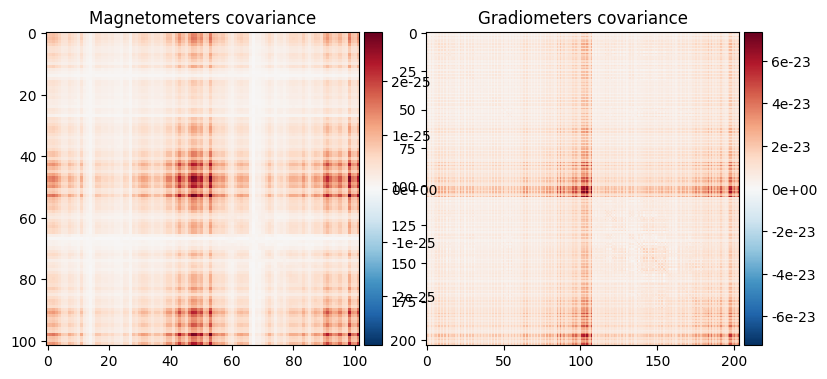

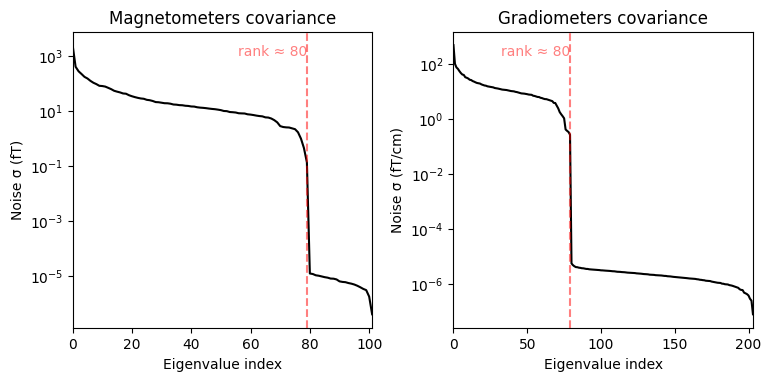

In [85]:
data_cov.plot(evoked.info, proj=True);

In [206]:
info_mag = mne.pick_info(noise_prep.info, mne.pick_types(noise_prep.info, meg='mag'))
info_grad = mne.pick_info(noise_prep.info, mne.pick_types(noise_prep.info, meg='grad'))
# Magnetometers
picks_mag = mne.pick_types(info_mag, meg='mag')
ch_names_mag = [info_mag['ch_names'][p] for p in picks_mag]
fwd_mag = mne.pick_channels_forward(fwd, ch_names_mag)
# Gradiometers
picks_grad = mne.pick_types(info_grad, meg='grad')
ch_names_grad = [info_grad['ch_names'][p] for p in picks_grad]
fwd_grad = mne.pick_channels_forward(fwd, ch_names_grad)

noise_cov_mag = mne.pick_channels_cov(noise_cov, ch_names_mag)
noise_cov_grad = mne.pick_channels_cov(noise_cov, ch_names_grad)

    102 out of 306 channels remain after picking
    204 out of 306 channels remain after picking


In [25]:
noise_cov

<Covariance | kind : full, shape : (306, 306), range : [-4.5e-24, +1.2e-23], n_samples : 30099>

In [67]:
data_cov = mne.compute_covariance(
    epochs,
    tmin=0.4,
    tmax=0.8,
    method='shrunk',
    rank='info'
)

/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/1613560498.py:1: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  data_cov = mne.compute_covariance(


    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 306 -> 80
Estimating covariance using SHRUNK
Done.
Number of samples used : 40100
[done]


In [72]:
filters = mne.beamformer.make_lcmv(
    evoked.info,
    fwd,
    data_cov,
    reg=0.07,
    noise_cov=noise_cov,
    pick_ori='max-power',
    weight_norm='unit-noise-gain',
    rank='info'
)

Computing rank from covariance with rank='info'
Found multiple SSS records. Using the first.
    MEG: rank 80 after 0 projectors applied to 306 channels
Computing rank from covariance with rank='info'
Found multiple SSS records. Using the first.
    MEG: rank 80 after 0 projectors applied to 306 channels
Making LCMV beamformer with rank {'meg': 80}
Computing inverse operator with 306 channels.
    306 out of 306 channels remain after picking
Selected 306 channels
Whitening the forward solution.
Computing rank from covariance with rank={'meg': 80}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8310 sources
Filter computation complete


In [73]:
stc_lcmv = mne.beamformer.apply_lcmv(evoked, filters)

In [74]:
stc_lcmv

<MixedSourceEstimate | 8310 vertices, subject : fsaverage, tmin : 0.0 (ms), tmax : 1199.0 (ms), tstep : 1.0 (ms), data shape : (8310, 1200), ~76.1 MB>

Showing: t = 0.518 s, (-35.0, -20.0, -15.0) mm, [9, 19, 12] vox, 16080 vertex
Using control points [0.18955073 0.20805698 0.32699826]


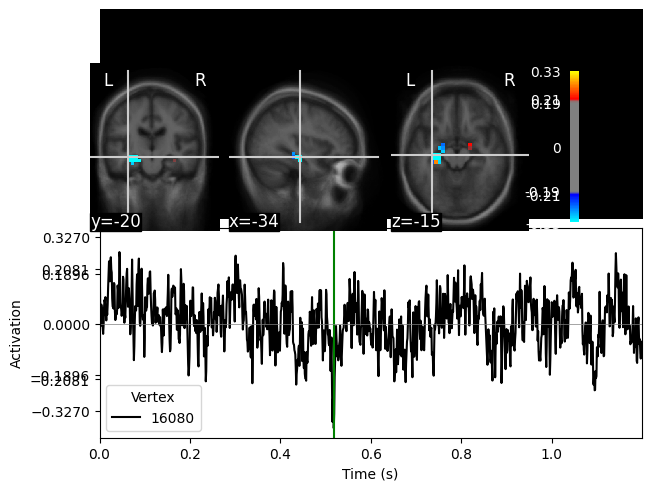

In [75]:
stc_lcmv.volume().plot(src=src);

In [84]:
stc_lcmv.plot(
    src=src,
    surface='pial'
)

Using control points [0.15971407 0.17679569 0.29639389]


In [92]:
np.max(stc_lcmv.volume().data, axis=1)

array([0.36366866, 0.30102577, 0.29107769, 0.31700105, 0.32011978,
       0.32041077, 0.27230041, 0.27084499, 0.28062499, 0.30137973,
       0.30263471, 0.28288995, 0.29130146, 0.2910507 , 0.30125347,
       0.30920425, 0.32740369, 0.35701217, 0.31971337, 0.2823108 ,
       0.26702627, 0.27011911, 0.27111569, 0.27416534, 0.28322117,
       0.2775866 , 0.30976234, 0.27768043, 0.32389736, 0.28385107,
       0.29632308, 0.29761174, 0.28505417, 0.30253924, 0.29619712,
       0.31415657, 0.29894944, 0.30792449, 0.33809463, 0.30430327,
       0.30621319, 0.31002926, 0.31592244, 0.3059784 , 0.30347814,
       0.30888869, 0.30399701, 0.30327144, 0.31256545, 0.30489313,
       0.29737218, 0.29736079, 0.31372662, 0.28099678, 0.27765765,
       0.29600039, 0.27770116, 0.2504532 , 0.22556078, 0.30832461,
       0.29680042, 0.27942625, 0.24152623, 0.20978768, 0.23737771,
       0.31374258, 0.27058848, 0.21462478, 0.17730219, 0.33298545,
       0.3270505 , 0.29579148, 0.2940506 , 0.21799534, 0.21890

In [207]:
inverse_op_grad = mne.minimum_norm.make_inverse_operator(info_grad, fwd_grad, noise_cov=noise_cov_grad)
inverse_op_mag = mne.minimum_norm.make_inverse_operator(info_mag, fwd_mag, noise_cov=noise_cov_mag)

Computing inverse operator with 204 channels.
    204 out of 204 channels remain after picking
Selected 204 channels
Creating the depth weighting matrix...
    204 planar channels
    limit = 7968/8310 = 10.011172
    scale = 3.98716e-08 exp = 0.8
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 5e-13 (2.2e-16 eps * 204 dim * 11  max singular value)
    Estimated rank (grad): 204
Found multiple SSS records. Using the first.
    GRAD: rank 204 computed from 204 data channels with 0 projectors
    Setting small GRAD eigenvalues to zero (without PCA)


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/513906879.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (204 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_op_grad = mne.minimum_norm.make_inverse_operator(info_grad, fwd_grad, noise_cov=noise_cov_grad)
/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/513906879.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (204 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_op_grad = mne.minimum_norm.make_inverse_operator(info_grad, fwd_grad, noise_cov=noise_cov_grad)


Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 8.32483
    scaling factor to adjust the trace = 5.02936e+21 (nchan = 204 nzero = 0)
Computing inverse operator with 102 channels.
    102 out of 102 channels remain after picking
Selected 102 channels
Creating the depth weighting matrix...
    102 magnetometer or axial gradiometer channels
    limit = 8217/8310 = 10.078493
    scale = 2.88783e-11 exp = 0.8
Whitening the forward solution.
Computing rank from covariance with rank=None
    Using tolerance 4e-14 (2.2e-16 eps * 102 dim * 1.8  max singular value)
    Estimated rank (mag): 102
Found multiple SSS records. Using the first.
    MAG: rank 102 computed from 102 data channels with 0 projectors
    Setting small MAG eigenvalues to zero (without PCA)
Creating the source covariance matrix


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/513906879.py:2: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_op_mag = mne.minimum_norm.make_inverse_operator(info_mag, fwd_mag, noise_cov=noise_cov_mag)
/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_33114/513906879.py:2: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (102 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  inverse_op_mag = mne.minimum_norm.make_inverse_operator(info_mag, fwd_mag, noise_cov=noise_cov_mag)


Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.
    largest singular value = 4.1722
    scaling factor to adjust the trace = 1.39266e+20 (nchan = 102 nzero = 0)


In [208]:
snr = 3
lambda2 = 1.0 / snr ** 2

evoked_grad = evoked.copy().pick_types(meg='grad')
evoked_mag = evoked.copy().pick_types(meg='mag')
stc_source_grad = mne.minimum_norm.apply_inverse(evoked_grad, inverse_op_grad, lambda2=lambda2, method='MNE')
stc_source_mag = mne.minimum_norm.apply_inverse(evoked_mag, inverse_op_mag, lambda2=lambda2, method='MNE')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 100
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 204 (0 small eigenvalues omitted)
Applying inverse operator to "1"...
    Picked 204 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained   1.3% variance
    Combining the current components...
[done]
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 100
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 102 (0 small eigenvalues om

In [43]:
stc_source_grad.plot(
    src=src,
    surface='pial'
)

Using pyvistaqt 3d backend.
Using control points [2.06451531e-10 3.09820270e-10 2.00760093e-09]


Showing: t = 0.600 s, (-30.0, -5.0, -25.0) mm, [10, 22, 10] vox, 13606 vertex
Using control points [ 3.91985012  6.8537424  18.57427695]


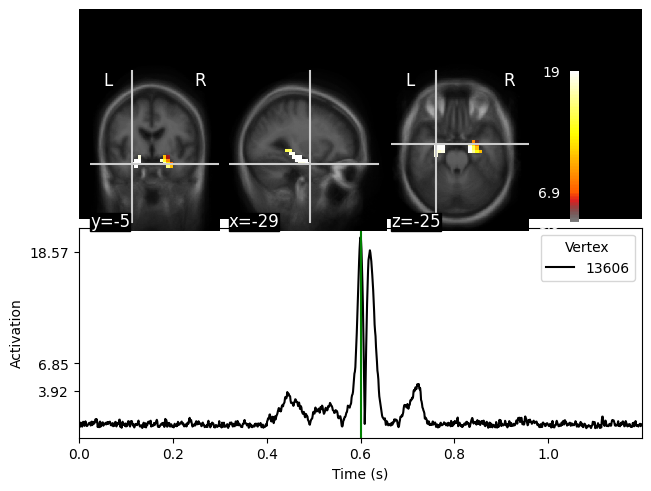

In [49]:
#sLORETA
stc_source_grad.volume().plot(src=src);

Showing: t = 0.602 s, (-25.0, -35.0, -5.0) mm, [11, 16, 14] vox, 18557 vertex
Using control points [1.27018278e-12 1.39018047e-12 2.65446745e-12]


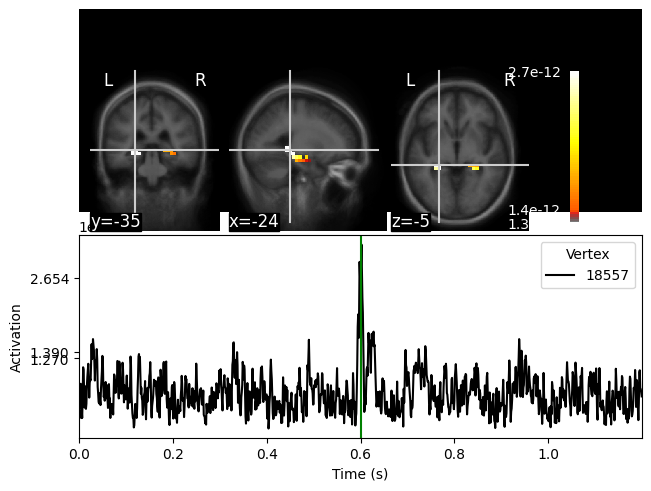

In [209]:
stc_source_grad.volume().plot(src=src);

Showing: t = 0.600 s, (-25.0, -10.0, -30.0) mm, [11, 21, 9] vox, 12287 vertex
Using control points [7.21847576e-12 1.29584793e-11 3.38476499e-11]


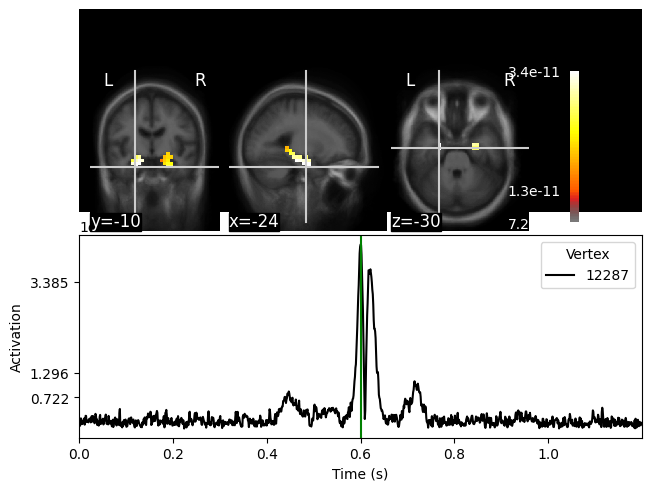

In [210]:
stc_source_mag.volume().plot(src=src);

In [229]:
averaged_stc = (stc_source_grad.data + stc_source_mag.data) / 2

In [93]:
#averaged_stc = stc_lcmv.data

In [230]:
peak_averaged_stc = np.max(averaged_stc, axis=1) 

In [213]:
peak_averaged_stc = np.max(averaged_stc, axis=1) / np.max(peak_averaged_stc)

In [214]:
peak_averaged_stc.shape

(8310,)

In [231]:
peak_averaged_stc[8197:8236]

array([1.75448197e-11, 1.70811110e-11, 1.93124386e-11, 1.96518890e-11,
       1.90512613e-11, 1.52275088e-11, 1.82646286e-11, 1.07229674e-11,
       1.47541294e-11, 1.76964486e-11, 1.90078558e-11, 1.42129512e-11,
       1.70410263e-11, 1.82089470e-11, 1.67284967e-11, 9.92484469e-12,
       1.33696717e-11, 1.67351682e-11, 9.49015063e-12, 1.30882886e-11,
       1.64725836e-11, 9.03658991e-12, 1.25979527e-11, 1.58766755e-11,
       1.69927364e-11, 1.18558916e-11, 1.49623245e-11, 1.80434093e-11,
       9.36770270e-12, 1.22231189e-11, 1.54238376e-11, 9.70003794e-12,
       1.22300989e-11, 1.12398197e-11, 1.40776746e-11, 1.11973051e-11,
       1.40447328e-11, 1.70028952e-11, 2.15026351e-11])

In [232]:
peak_averaged_stc[8250:8292]

array([1.48480797e-11, 1.15503905e-11, 1.29079207e-11, 1.27703102e-11,
       1.13614281e-11, 1.20692135e-11, 1.33039050e-11, 1.29418726e-11,
       1.24210015e-11, 1.22735645e-11, 1.10186120e-11, 1.10507065e-11,
       1.21311270e-11, 1.18231946e-11, 1.04143628e-11, 8.81245559e-12,
       1.12012940e-11, 1.32688638e-11, 1.18738478e-11, 1.27844040e-11,
       1.22141373e-11, 1.06927304e-11, 1.18758211e-11, 1.13322397e-11,
       9.81441749e-12, 1.07576858e-11, 1.27766976e-11, 1.15520246e-11,
       1.30250938e-11, 1.20918076e-11, 1.04627394e-11, 1.11727718e-11,
       9.38100214e-12, 1.19376296e-11, 1.16316667e-11, 1.27377537e-11,
       1.25166718e-11, 1.16176980e-11, 1.05370910e-11, 1.07053596e-11,
       9.42288372e-12, 1.64797213e-11])

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [215]:
peak_averaged_stc[:8196] = np.where(peak_averaged_stc[:8250] < 1.1, 0, 1)
peak_averaged_stc[8196:] = np.where(peak_averaged_stc[8250:8292] < 0, 0, 1)
peak_averaged_stc[8196:] = np.where(peak_averaged_stc[8292:] < 1.1, 0, 1)

In [216]:
#np.savetxt("source_test_cl.out", peak_averaged_stc)

In [217]:
mne_coords = np.concatenate([s['rr'][s['inuse'].astype(bool)] for s in src])

In [218]:
mne_coords.shape

(8310, 3)

In [219]:
act_coords = []

for elem, s in zip(peak_averaged_stc.tolist(), mne_coords):
    if elem == 1:
        act_coords.append(s * 1000)

In [220]:
len(act_coords)

38

In [221]:
av_coord = sum(act_coords)/len(act_coords)

In [222]:
av_coord

array([ -6.76646995,  -6.00933029, -17.14657386])

In [223]:
true_coords = mne_coords[8250]
#true_coords = mne_coords[8271]

In [224]:
true_coords 

array([ 0.03, -0.01, -0.03])

In [225]:
np.linalg.norm(av_coord - true_coords) 

19.369075049598756

In [226]:
brain = mne.viz.Brain(
    "fsaverage",
    subjects_dir=subjects_dir,
    cortex="low_contrast",
    alpha=0.25,
    background="white"
)
brain.add_foci(
    act_coords,
    coords_as_verts=False,
    color="red",
    hemi="vol",
    scale_factor=0.1
)

brain.add_foci(
    true_coords * 1000,
    coords_as_verts=False,
    color="blue",
    hemi="vol",
    scale_factor=0.3
)

brain.show_view("lateral")

In [51]:
max_source = 0
max_gain =  0

for i in range(averaged_stc .shape[0]):
    if max(averaged_stc [i]) > max_gain:
        max_gain = max(averaged_stc [i]) 
        max_source = i

In [52]:
max_source, max_gain

(5309, 3.89590657750935e-09)

In [106]:
for i, verts in enumerate(stc_source.vertices):
    print(f"Source space {i}: {len(verts)} vertices")

Source space 0: 4098 vertices
Source space 1: 4098 vertices
Source space 2: 39 vertices
Source space 3: 14 vertices
Source space 4: 42 vertices
Source space 5: 19 vertices


In [82]:
4098 * 2 + 39 + 14

8249

In [110]:
stc_source.data[8249::]

array([[1.29210667, 1.75148231, 2.09234227, ..., 1.58873201, 0.84651245,
        0.76745952],
       [1.77493467, 2.38495165, 2.96694526, ..., 1.85221137, 1.1364923 ,
        1.00305277],
       [0.74786892, 0.88871645, 1.03081407, ..., 1.21558582, 0.4613236 ,
        0.66042077],
       ...,
       [0.88199834, 1.13654102, 1.26728067, ..., 1.25321869, 0.76402316,
        0.80325636],
       [1.33491723, 1.61861146, 2.03845978, ..., 1.41588821, 1.0071663 ,
        1.05338716],
       [1.16995583, 1.38519216, 1.55523091, ..., 1.42561015, 1.0314772 ,
        0.982015  ]])

In [120]:
data = stc_source.data
peak_per_vertex = np.max(data, axis=1)
counts = [len(v) for v in stc_source.vertices]
cum_counts = np.cumsum(counts)

start = 0
for i, count in enumerate(counts):
    end = start + count
    space_peaks = peak_per_vertex[start:end]
    local_max_idx = np.argmax(space_peaks)
    global_idx = start + local_max_idx
    vertex_number = stc_source.vertices[i][local_max_idx]
    print(f"Source space {i}:")
    print(f"  Global index: {global_idx}")
    print(f"  Vertex number: {vertex_number}")
    print(f"  Peak value: {peak_per_vertex[global_idx]}")
    print()
    start = end


Source space 0:
  Global index: 2464
  Vertex number: 96309
  Peak value: 1415.4367257611498

Source space 1:
  Global index: 6022
  Vertex number: 75050
  Peak value: 1735.5283586016303

Source space 2:
  Global index: 8196
  Vertex number: 12287
  Peak value: 516.6846102049681

Source space 3:
  Global index: 8235
  Vertex number: 12320
  Peak value: 532.8521292785355

Source space 4:
  Global index: 8250
  Vertex number: 12298
  Peak value: 510.311148773731

Source space 5:
  Global index: 8297
  Vertex number: 13651
  Peak value: 891.8792236147293



## Spike visualisation

In [154]:
tiny_evoked_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [244]:
tiny_evoked = mne.EvokedArray(tiny_evoked_data, info=noise_prep.info, tmin=0)

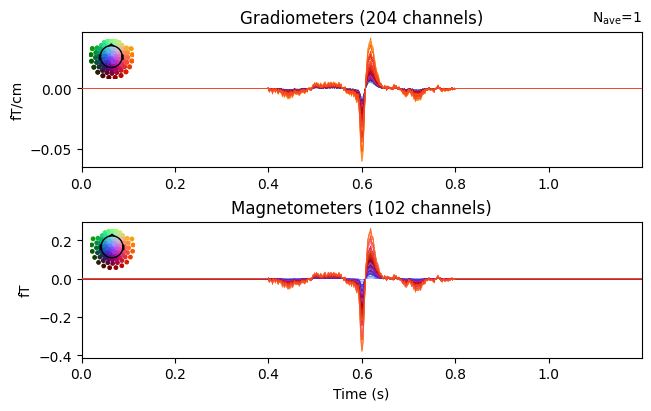

In [245]:
tiny_evoked.plot();

In [157]:
tiny_evoked.data.shape

(306, 1200)

In [176]:
noise_magn = noise_prep.copy().pick(156)

In [186]:
max(noise_magn.get_data()[0].tolist())

3.5020670543609384e-11

In [204]:
test_noise = [(x/10**4*1.2)/10 for x in noise_magn.get_data()[0].tolist()]

In [222]:
noise_prep.get_data(start=2000, stop=3200).shape

(306, 1200)

In [246]:
SNR = 5

In [247]:
noise_to_add = noise_prep.get_data(start=2000, stop=3200)/ 10**4 * 1.2 / SNR
tiny_evoked.data = tiny_evoked.data + noise_to_add # adding noise

In [248]:
tiny_evoked.data

array([[-1.24599356e-16,  1.12413262e-18, -9.01785543e-18, ...,
         2.59081110e-16,  1.84304257e-17, -2.29129089e-17],
       [-5.20958506e-17, -9.40763395e-17, -7.55534342e-17, ...,
        -1.24800816e-16, -4.84925057e-17,  8.34886370e-18],
       [ 6.51942383e-18,  6.00624112e-18,  3.39557590e-18, ...,
         3.18915399e-19,  1.34818122e-18,  5.64640220e-19],
       ...,
       [-9.50118813e-17, -1.67282843e-16, -1.47245612e-16, ...,
         1.55976798e-16,  2.97235047e-17,  1.37137157e-16],
       [-1.34406123e-17, -1.11727113e-16, -2.86172129e-16, ...,
        -1.73431020e-16, -1.78620659e-16, -1.64606862e-16],
       [-1.05998360e-17, -8.64799562e-18, -6.25497326e-18, ...,
        -1.42974559e-17, -1.40307619e-17, -1.38475251e-17]])

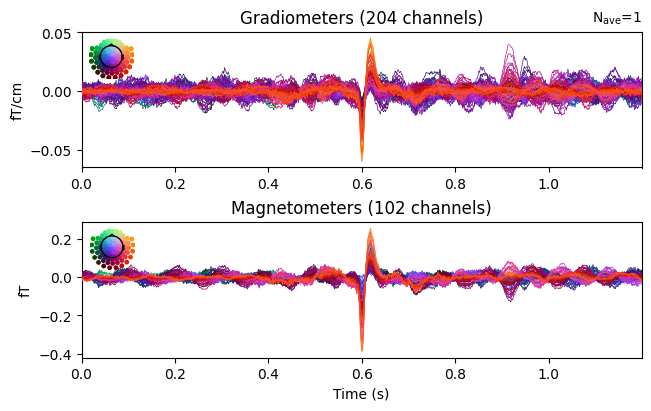

In [249]:
tiny_evoked.plot();

## SNR estim

In [3]:
ar_check = mne.io.read_raw_fif('/Users/diana/Desktop/A0R0_ii_run5_raw_tsss_mc_art_corr.fif')

Opening raw data file /Users/diana/Desktop/A0R0_ii_run5_raw_tsss_mc_art_corr.fif...
    Range : 0 ... 1181999 =      0.000 ...  1181.999 secs
Ready.


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_67522/3686988333.py:1: RuntimeWarning: This filename (/Users/diana/Desktop/A0R0_ii_run5_raw_tsss_mc_art_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  ar_check = mne.io.read_raw_fif('/Users/diana/Desktop/A0R0_ii_run5_raw_tsss_mc_art_corr.fif')


In [15]:
ar_check=ar_check.pick('meg')

In [17]:
sample = ar_check.get_data(start=2000, stop=300000)

In [18]:
max_sensor = 0
max_gain =  0
for i in range(sample.shape[0]):
    if max(sample[i]) > max_gain:
        max_gain = max(sample[i]) 
        max_sensor = i

In [19]:
max_sensor, max_gain

(159, 6.7780561791169e-11)

In [8]:
ar_check.get_data().shape

(350, 1182000)

(array([5.20000e+01, 1.92000e+02, 4.31000e+02, 8.70000e+02, 1.85600e+03,
        5.28400e+03, 2.24820e+04, 7.27540e+04, 1.07056e+05, 6.30810e+04,
        1.77690e+04, 3.64800e+03, 1.09400e+03, 5.79000e+02, 3.56000e+02,
        2.21000e+02, 1.30000e+02, 7.80000e+01, 5.20000e+01, 1.50000e+01]),
 array([-4.91938614e-11, -4.33451403e-11, -3.74964191e-11, -3.16476980e-11,
        -2.57989768e-11, -1.99502556e-11, -1.41015345e-11, -8.25281331e-12,
        -2.40409215e-12,  3.44462901e-12,  9.29335018e-12,  1.51420713e-11,
         2.09907925e-11,  2.68395137e-11,  3.26882348e-11,  3.85369560e-11,
         4.43856771e-11,  5.02343983e-11,  5.60831195e-11,  6.19318406e-11,
         6.77805618e-11]),
 <BarContainer object of 20 artists>)

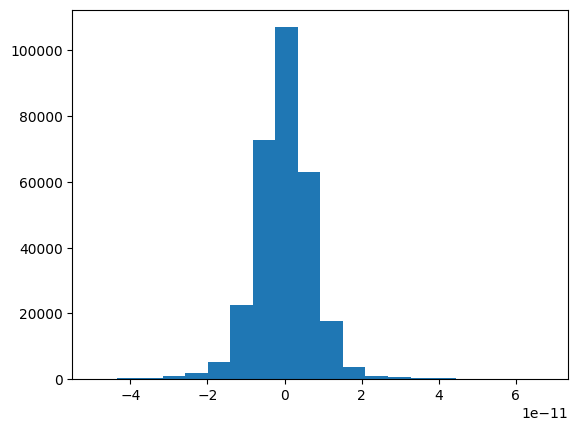

In [20]:
plt.hist(sample[159], bins=20)

In [21]:
current_raw = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')

Opening raw data file SIM_10_raw_tsss_mc.fif...
    Range : 0 ... 119999 =      0.000 ...   119.999 secs
Ready.


/var/folders/s_/hsjplx7j0zqcp5bdmqbv5hcm0000gn/T/ipykernel_67522/614544033.py:1: RuntimeWarning: This filename (SIM_10_raw_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  current_raw = mne.io.read_raw_fif('SIM_10_raw_tsss_mc.fif')


(array([   405.,    296.,    215.,    193.,   1649., 102799.,  11918.,
           836.,    574.,   1115.]),
 array([-6.27814652e-11, -5.20728752e-11, -4.13642852e-11, -3.06556952e-11,
        -1.99471052e-11, -9.23851518e-12,  1.47007482e-12,  1.21786648e-11,
         2.28872548e-11,  3.35958448e-11,  4.43044348e-11]),
 <BarContainer object of 10 artists>)

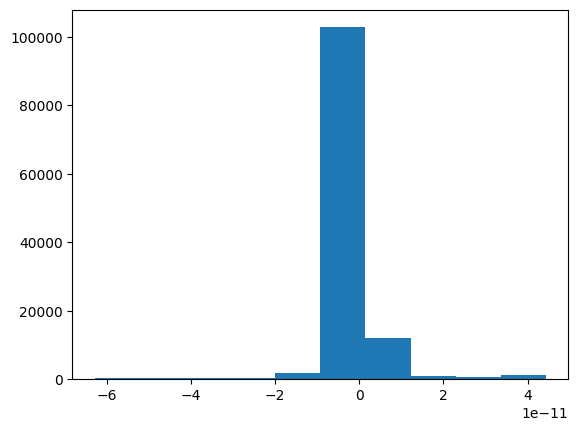

In [23]:
plt.hist(current_raw.get_data()[156], bins=10)

In [205]:
max(test_noise)

4.2024804652331263e-16

In [206]:
max_sensor = 0
max_gain =  0

for i in range(tiny_evoked.data.shape[0]):
    if max(tiny_evoked.data[i]) > max_gain:
        max_gain = max(tiny_evoked.data[i]) 
        max_sensor = i

In [207]:
(max_sensor, max_gain) # 4.216430836459022e-15 -- signal

(156, 4.216430836459022e-15)

In [211]:
test_snr = max_gain/max(test_noise)

In [212]:
test_snr 

10.033195564717806

In [164]:
len(tiny_evoked.ch_names), tiny_evoked.ch_names[156] # a gradiometer

(306, 'MEG1433')

In [161]:
tiny_evoked.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers
 custom_ref_applied: False
 description: Vectorview system
 dev_head_t: MEG device -> head transform
 dig: 165 items (3 Cardinal, 4 HPI, 158 Extra)
 experimenter: meg
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2020-07-29 11:46:58 UTC
 meas_id: 4 items (dict)
 nchan: 306
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: abrar
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

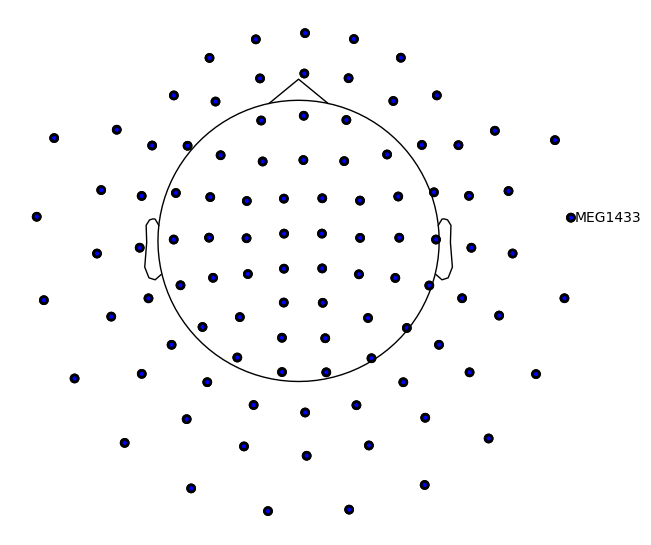

In [165]:
mne.viz.plot_sensors(tiny_evoked.info, ch_type='grad', show_names=["MEG1433"]);

In [104]:
#tiny_evoked = mne.apply_forward(fwd, tiny_stc, info=noise.info)

## Prep

In [44]:
stc.save('spike-smooth-stc.h5', ftype='h5', overwrite=True)

In [49]:
!pip install h5io

  Using cached h5py-3.15.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.0 kB)
Using cached h5py-3.15.1-cp312-cp312-macosx_11_0_arm64.whl (2.8 MB)

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [45]:
%cd /Users/diana/Library/jupyterlab-desktop/jlab_server/lib/python3.12

/Users/diana/Library/jupyterlab-desktop/jlab_server/lib/python3.12


/Users/diana/Documents/GitHub/megspikes/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import site
site.getsitepackages()

['/Users/diana/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages']

In [61]:
!pip uninstall h5py h5io h5io-browser -y
!pip cache purge
!pip install h5py

Found existing installation: h5py 3.15.1
Uninstalling h5py-3.15.1:
  Successfully uninstalled h5py-3.15.1
Found existing installation: h5io_browser 0.2.10
Uninstalling h5io_browser-0.2.10:
  Successfully uninstalled h5io_browser-0.2.10
Files removed: 6 (2.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [150]:
bem = mne.make_bem_solution(model)

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [145]:
labels_vol = [
            'Left-Hippocampus', 'Left-Amygdala', 
            'Right-Hippocampus', 'Right-Amygdala',
        ]

src = mne.setup_source_space(subject, spacing="oct6", add_dist=False, subjects_dir=subjects_dir)

vol_src = mne.setup_volume_source_space(
                subject=subject,
                pos=5.0,  # Шаг сетки в мм
                bem=bem,
                #mri=fname_aseg,
                volume_label=labels_vol,
                subjects_dir=subjects_dir,
                add_interpolator=True,
                verbose=True
            )
src += vol_src

# Сохранение
mne.write_source_spaces(fsrc, src, overwrite=True, verbose='error')

Setting up the source space with the following parameters:

SUBJECTS_DIR = /Users/diana/mne_data/MNE-fsaverage-data
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 6

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /Users/diana/mne_data/MNE-fsaverage-data/fsaverage/surf/lh.white...
Mapping lh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/diana/mne_data/MNE-fsaverage-data/fsaverage/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 4098/163842 selected to source space (oct = 6)

Loading /Users/diana/mne_data/MNE-fsaverage-data/fsaverage/surf/rh.white...
Mapping rh fsaverage -> oct (6) ...
    Triangle neighbors and vertex normals...
Loading geometry from /Users/diana/mne_data/MNE-fsaverage-data/fsaverage/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 4098/163842 selected to source space (

In [154]:
fwd = mne.make_forward_solution(
                noise.info,
                trans=trans,
                src=src,
                bem=bem,
                meg=True,
                eeg=False,
                mindist=5.0
            )

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>, <volume (Left-Hippocampus), n_used=39>, <volume (Left-Amygdala), n_used=14>, <volume (Right-Hippocampus), n_used=42>, <volume (Right-Amygdala), n_used=19>] MRI (surface RAS) coords, subject 'fsaverage', ~318.2 MB>
MRI -> head transform : /Users/diana/Documents/GitHub/megspikes/venv/lib/python3.10/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 6 source spaces a total of 8310 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999994 0.003552 0.000202      -1.76 mm
    -0.003558 0.998389 0.056626      31.09 mm
    -0.000001 -0.056626 0.998395      39.60 mm
    0.000000 0.000000 0.000000       1.00

Read 306 MEG channels from info
105 coi